In [1]:
import os 
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,Dense

In [2]:
path=r"C:\Users\vanam\Downloads\lime leafes\Original Dataset"

In [3]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(path,image_size=(128,128),subset="training",validation_split=0.2,seed=1,batch_size=50)
test_data=tf.keras.preprocessing.image_dataset_from_directory(path,image_size=(128,128),subset="validation",validation_split=0.2,seed=1,batch_size=50)

Found 1354 files belonging to 9 classes.
Using 1084 files for training.
Found 1354 files belonging to 9 classes.
Using 270 files for validation.


In [4]:
map_dict=dict(zip([i for i in range(len(train_data.class_names))],train_data.class_names))
map_dict

{0: 'Anthracnose',
 1: 'Bacterial Blight',
 2: 'Citrus Canker',
 3: 'Curl Virus',
 4: 'Deficiency Leaf',
 5: 'Dry Leaf',
 6: 'Healthy Leaf',
 7: 'Sooty Mould',
 8: 'Spider Mites'}

In [5]:
training_images=[]
training_classes=[]
for image,clas in train_data:
    training_images.append(image.numpy())
    training_classes.append(clas)

In [6]:
train_images=np.concatenate(training_images,axis=0)
train_classes=np.concatenate(training_classes,axis=0)

In [7]:
train_images=train_images/255.0

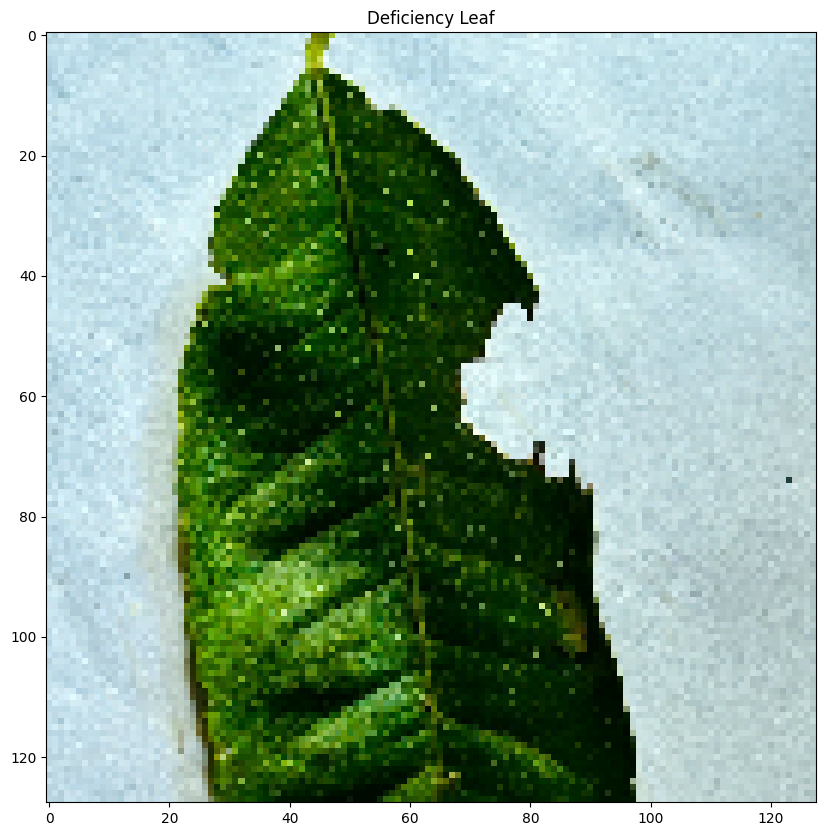

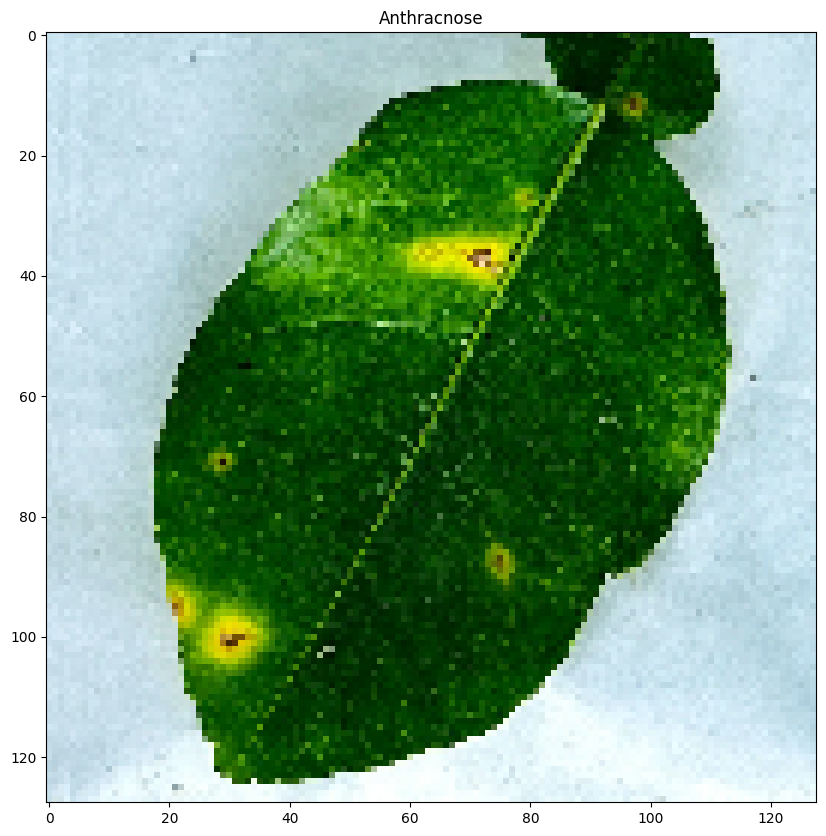

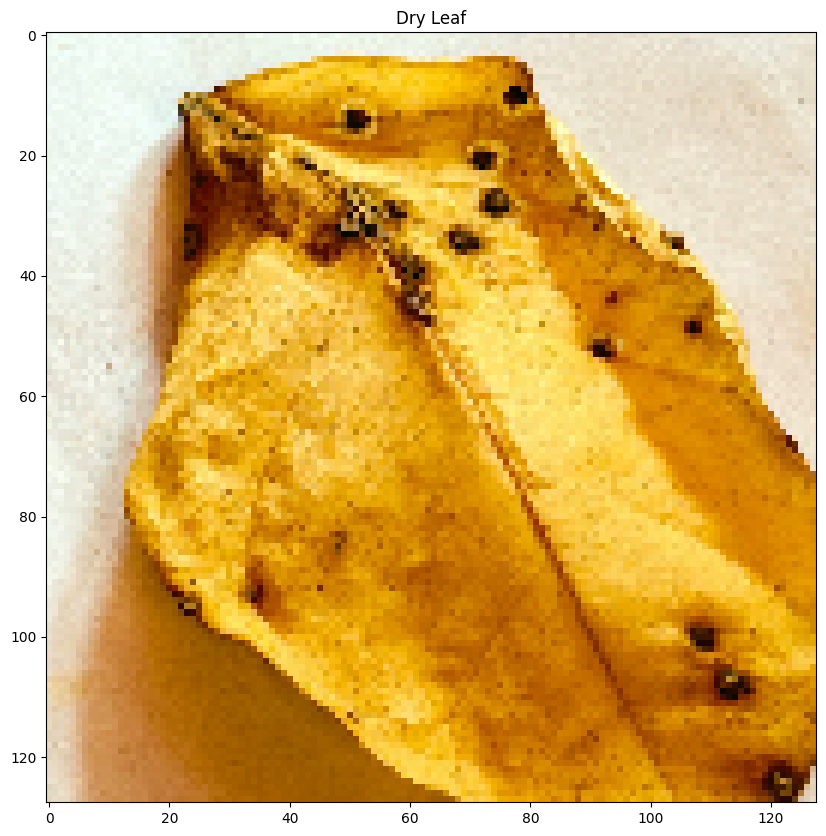

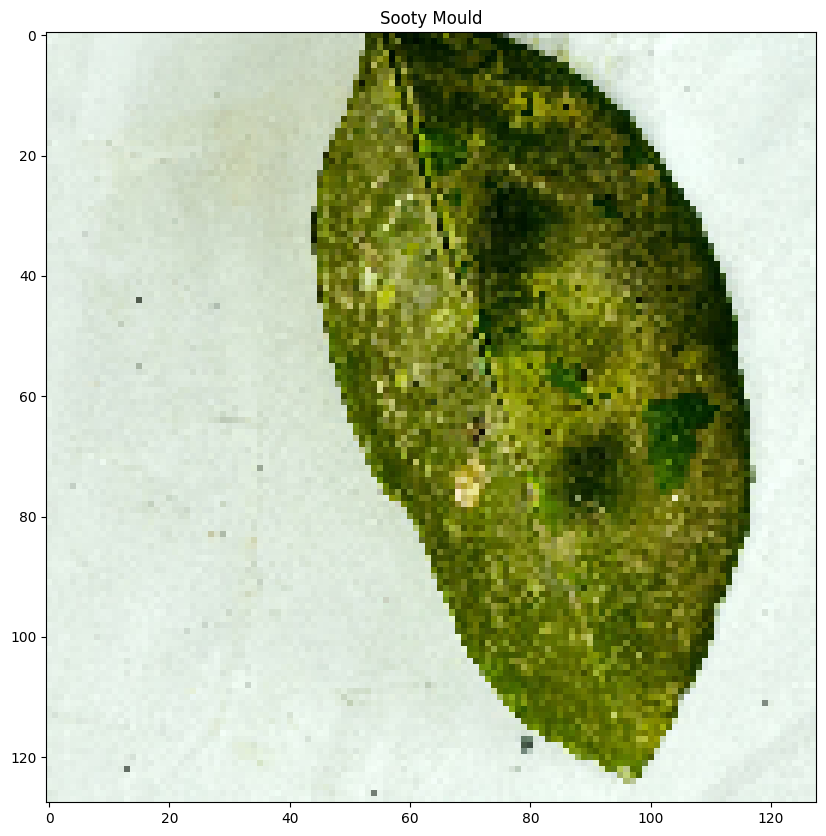

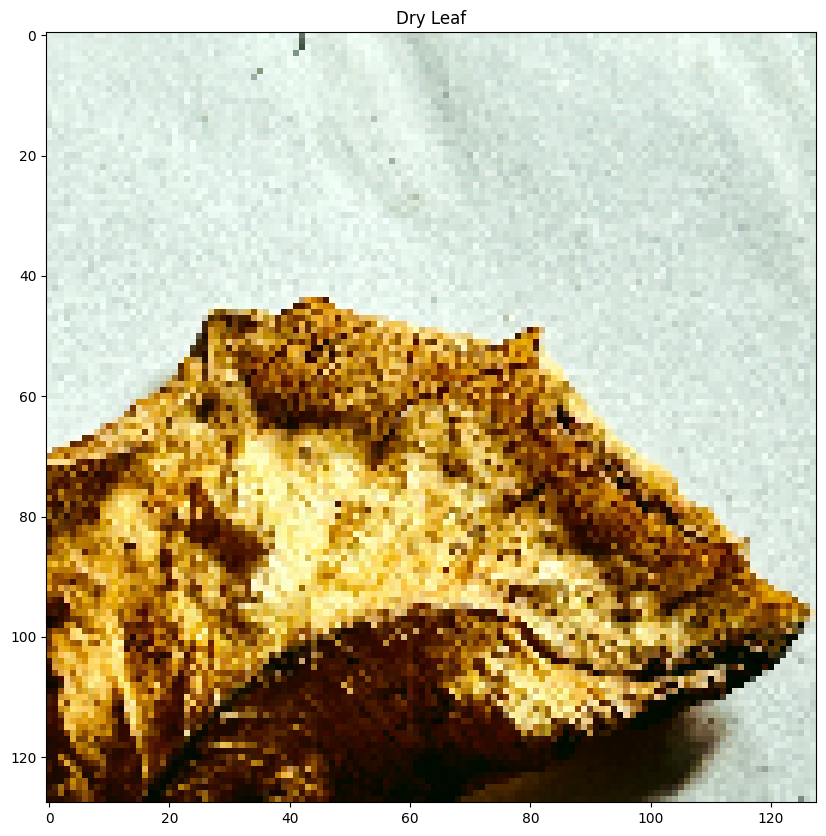

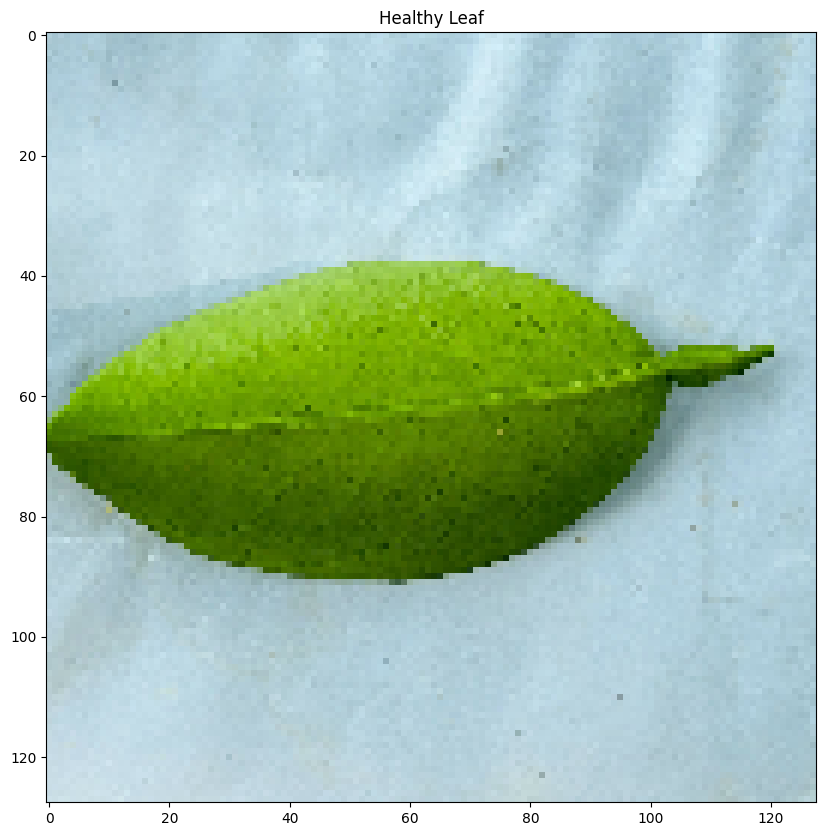

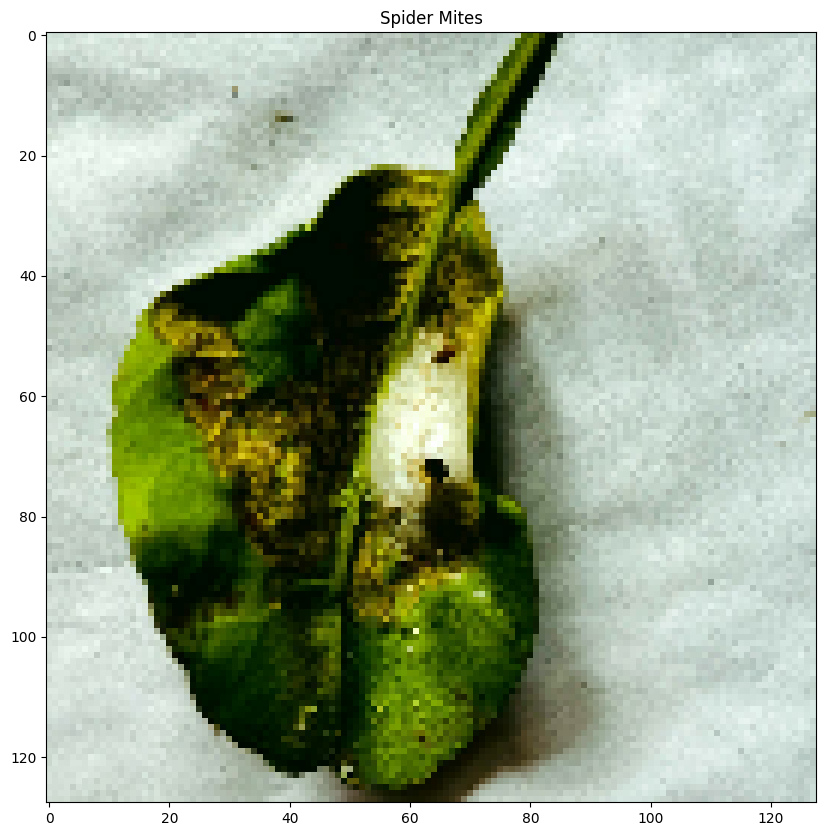

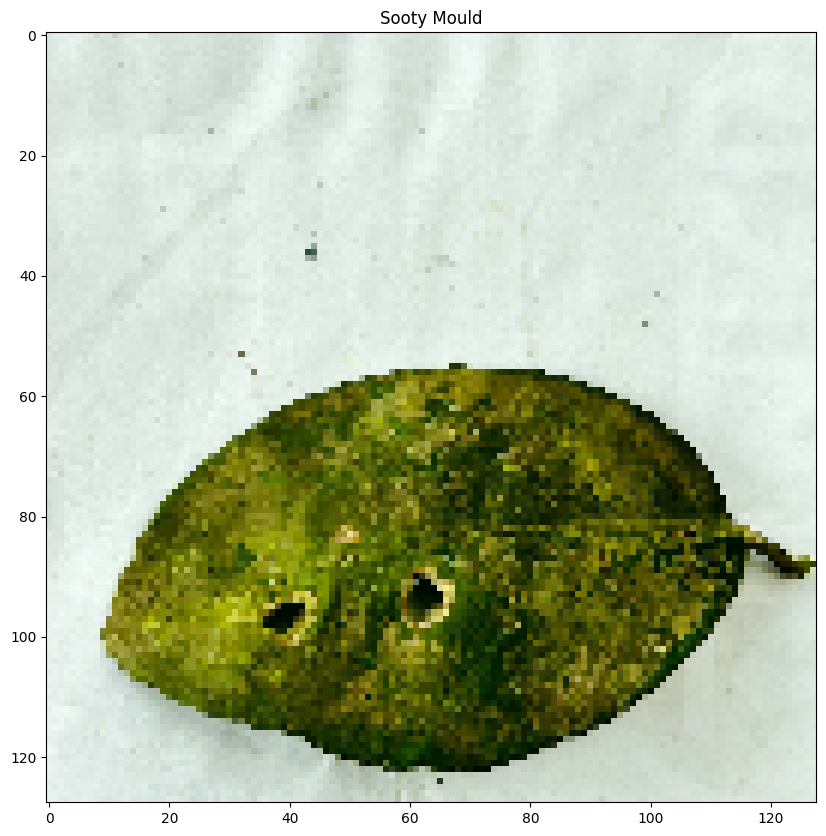

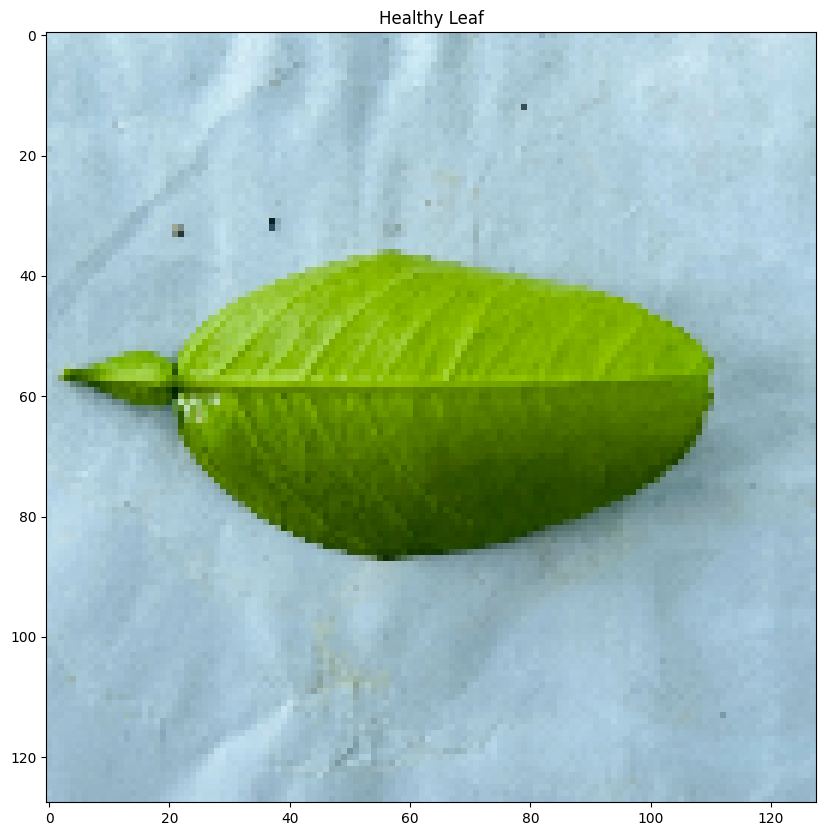

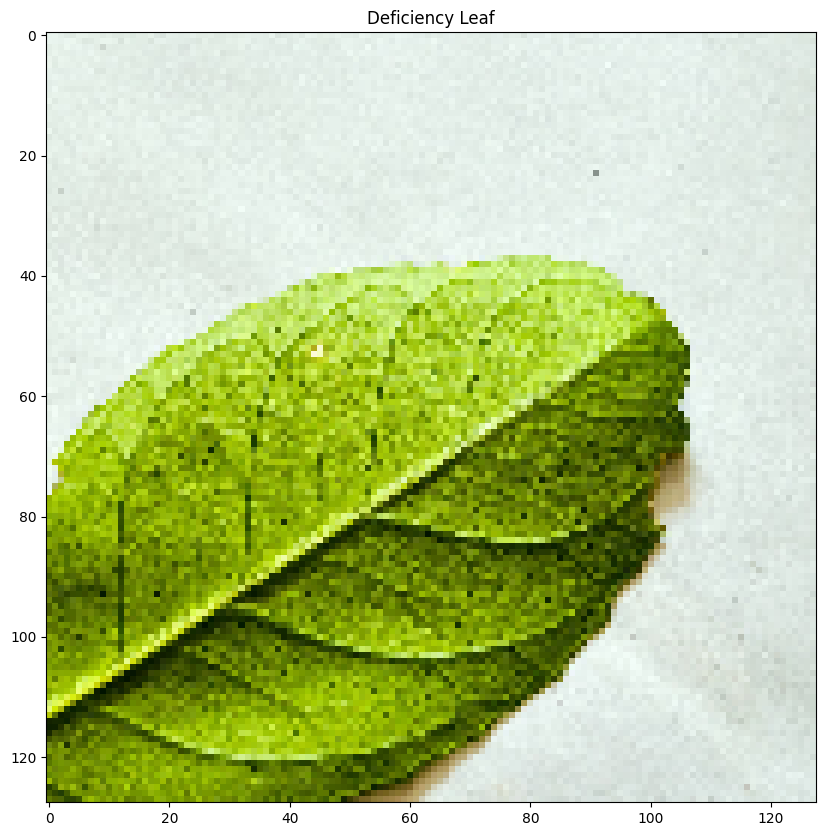

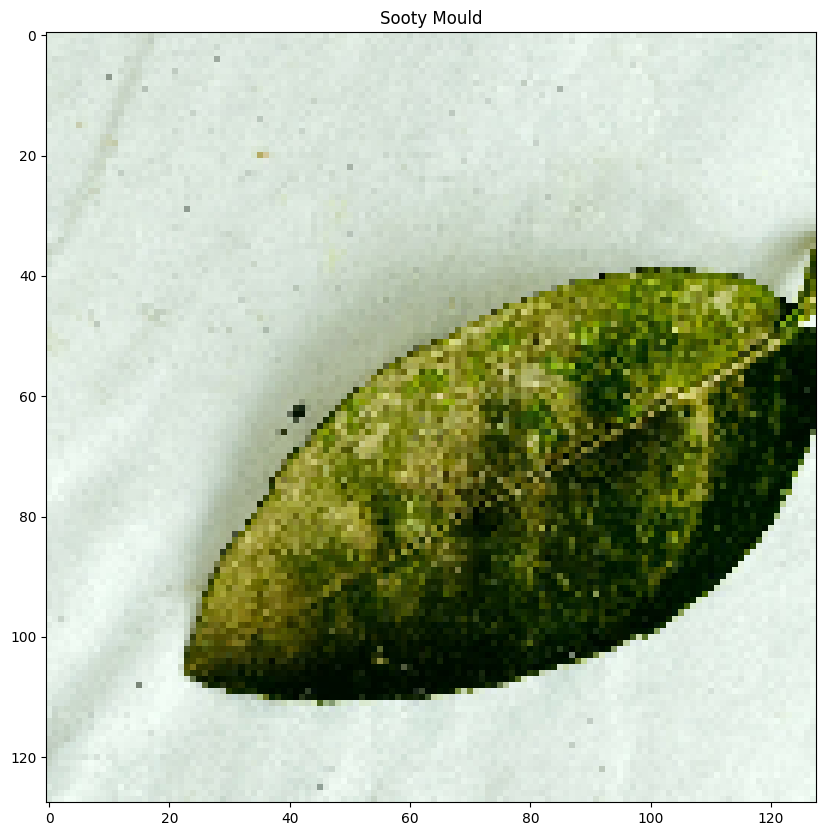

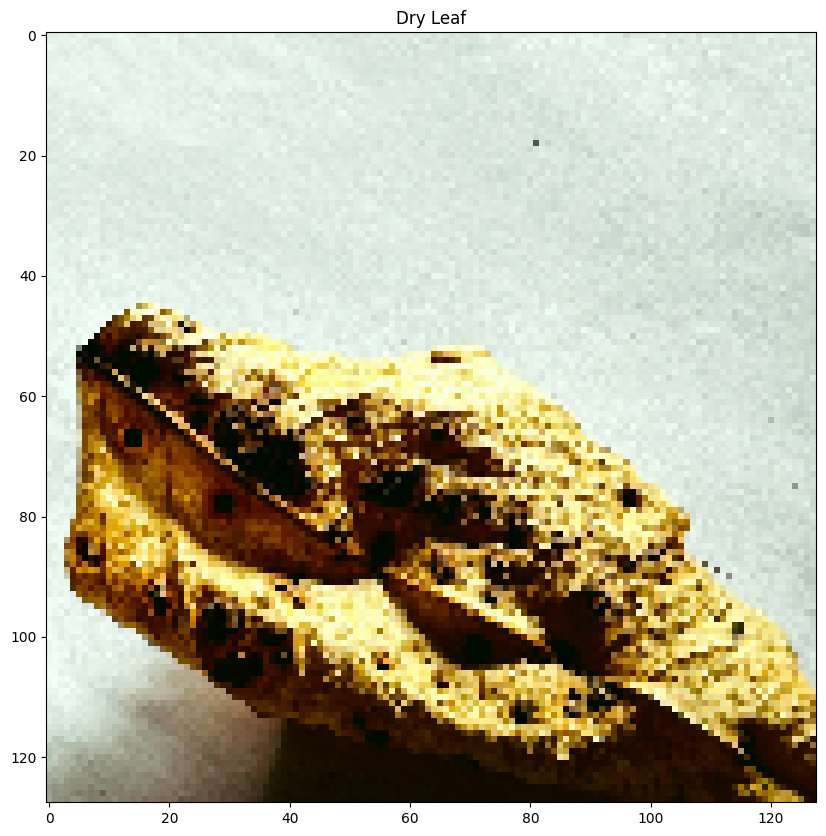

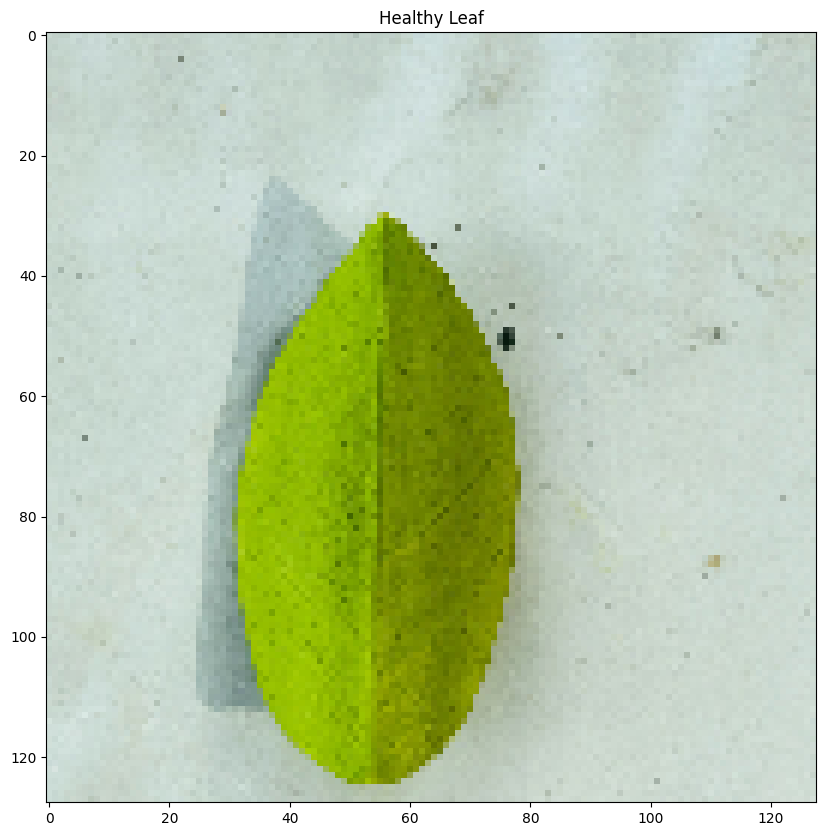

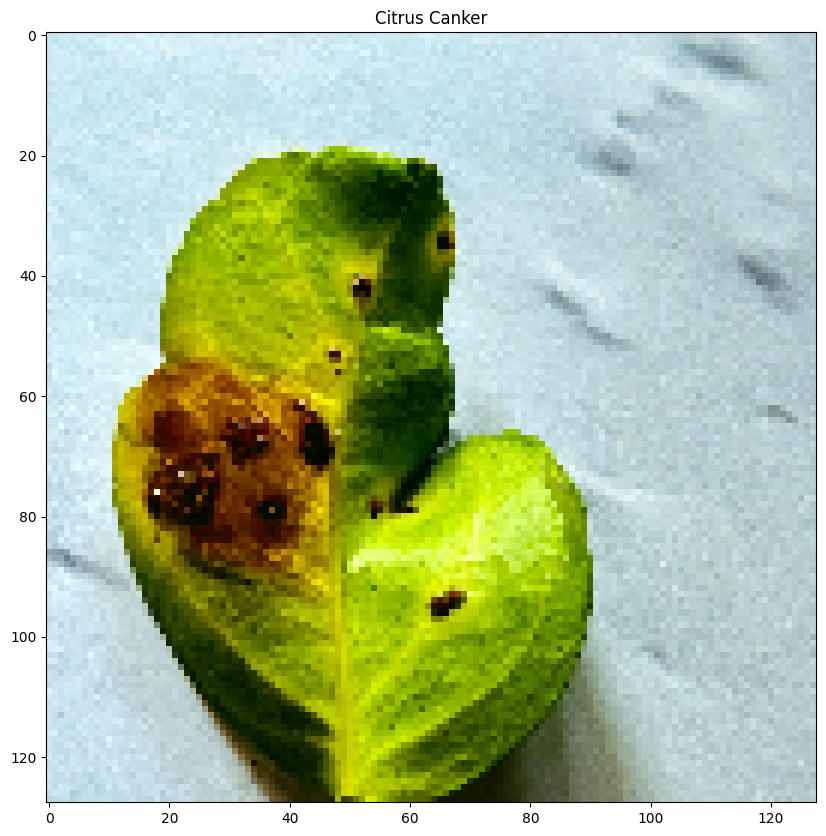

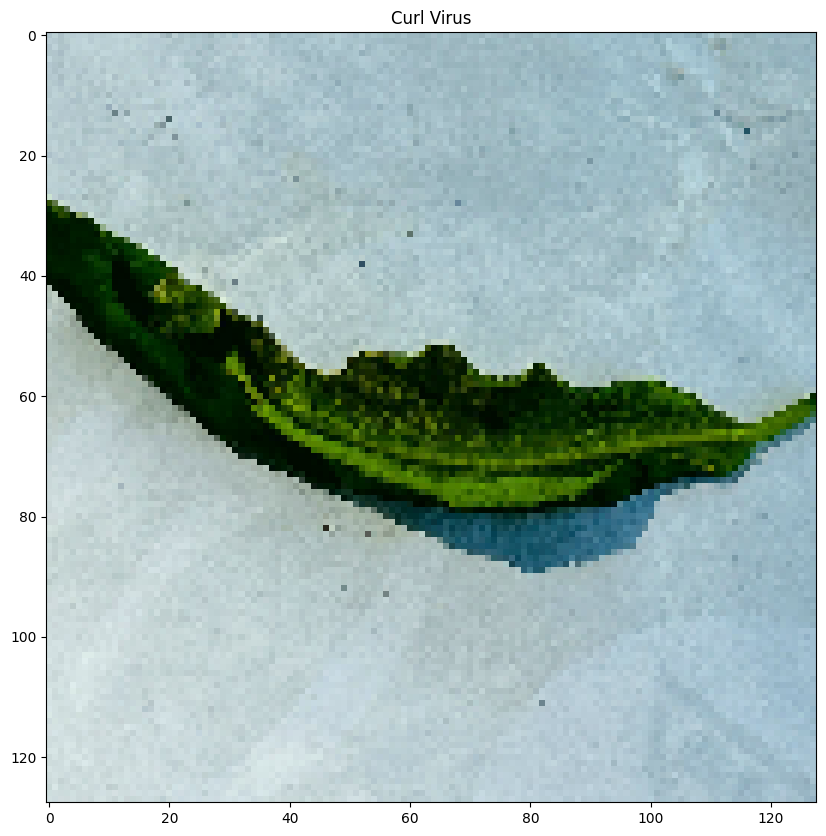

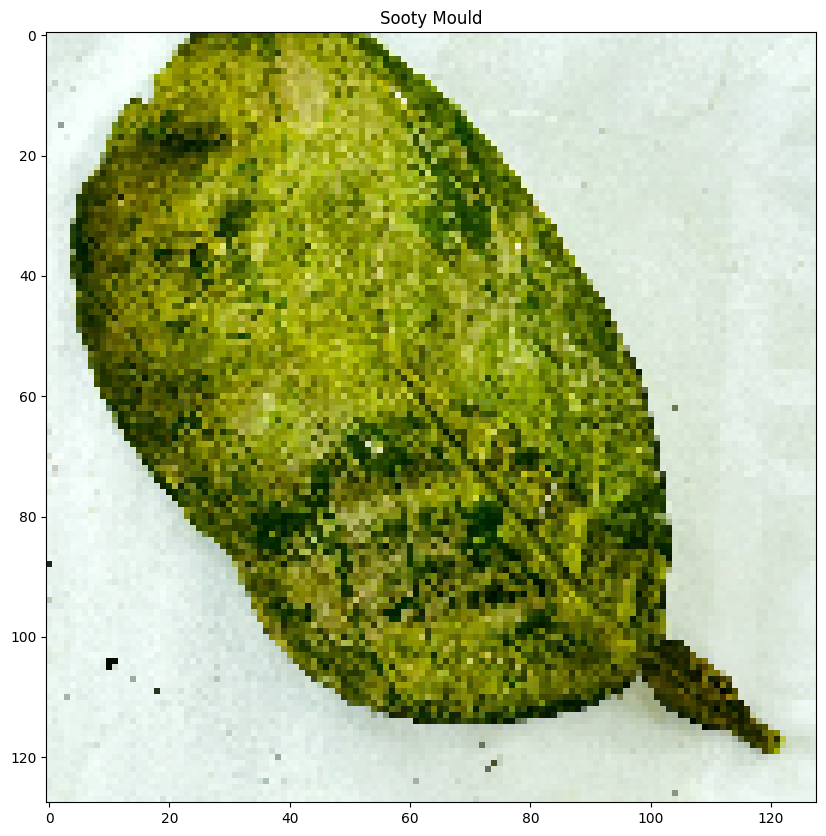

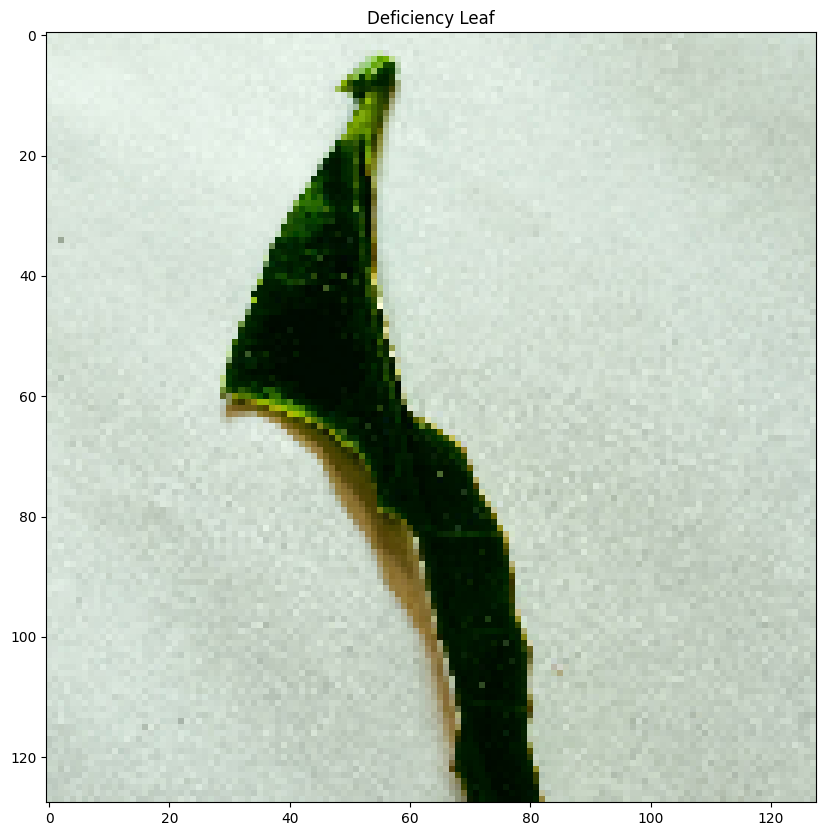

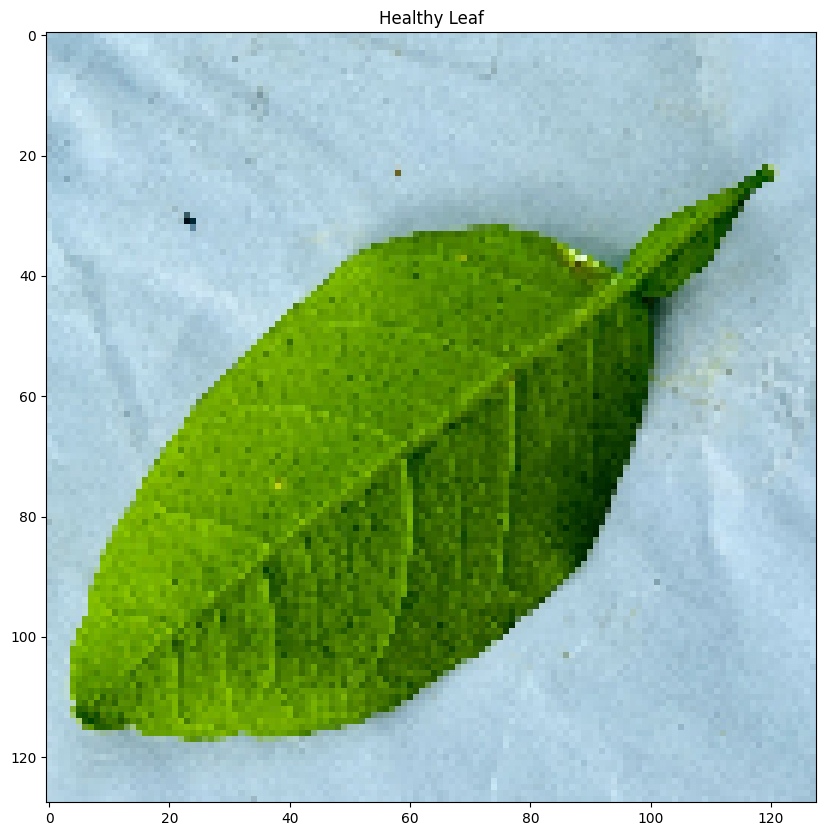

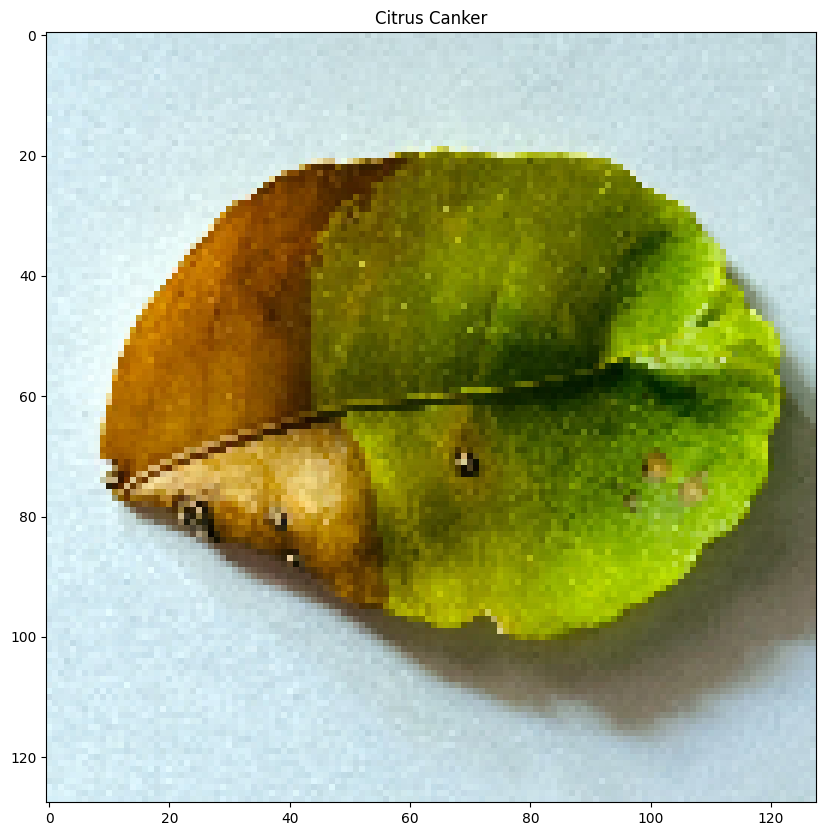

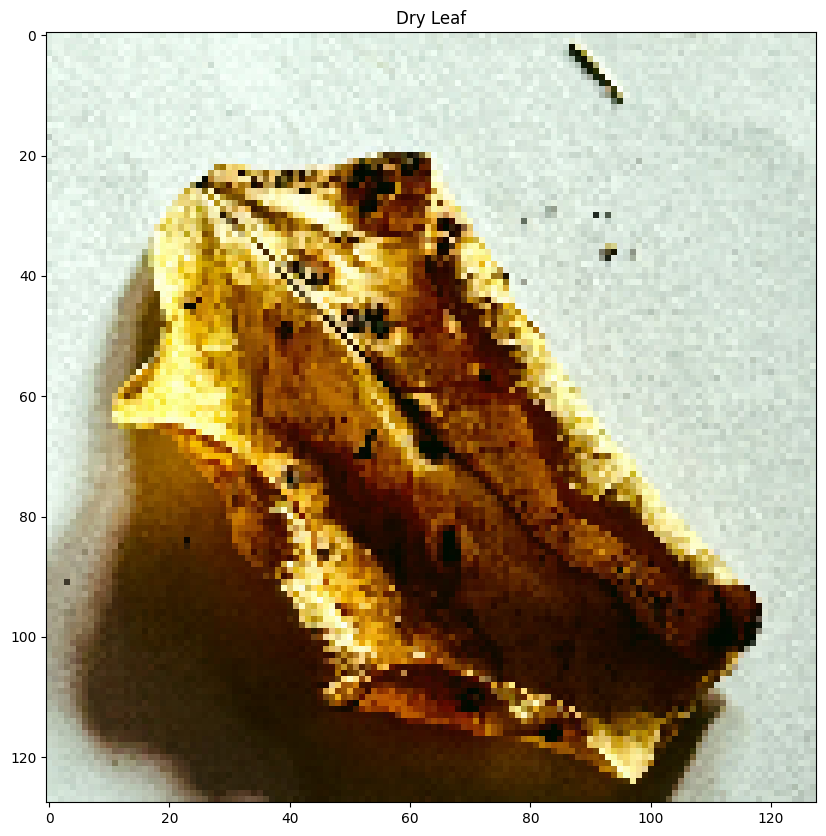

In [8]:
#visualizing first 20 classes
for i in range(20):
    plt.figure(figsize=(10,10))
    plt.title(map_dict[train_classes[i]])
    plt.imshow(train_images[i])
    plt.show()

In [21]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(3,3))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(3,3))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(3,3))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Flatten())

In [23]:
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.6))

In [24]:
model.add(Dense(9,activation="softmax"))

In [25]:
model.compile(optimizer="adam",metrics=["accuracy"],loss="categorical_crossentropy")

In [13]:
test_images=[]
test_classes=[]
for image,clas in test_data:
    test_images.append(image.numpy())
    test_classes.append(clas)

In [14]:
test_images=np.concatenate(test_images,axis=0)
test_classes=np.concatenate(test_classes,axis=0)

In [15]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_classes, num_classes=9)
test_labels=to_categorical(test_classes, num_classes=9)

In [16]:
print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)

(1084, 128, 128, 3) (1084, 9) (270, 128, 128, 3) (270, 9)


In [17]:
test_images=test_images/255.0

In [ ]:
es=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [30]:
report=model.fit(train_images,train_labels,epochs=80,validation_data=[test_images,test_labels],callbacks=es)

Epoch 1/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 326ms/step - accuracy: 0.9250 - loss: 0.2749 - val_accuracy: 0.8370 - val_loss: 0.6170
Epoch 2/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.9251 - loss: 0.2602 - val_accuracy: 0.8259 - val_loss: 0.6556
Epoch 3/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 318ms/step - accuracy: 0.9384 - loss: 0.1829 - val_accuracy: 0.7963 - val_loss: 0.9578
Epoch 4/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.9322 - loss: 0.1972 - val_accuracy: 0.7333 - val_loss: 1.5330
Epoch 5/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.9516 - loss: 0.1532 - val_accuracy: 0.6741 - val_loss: 1.9410
Epoch 6/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 0.9364 - loss: 0.1859 - val_accuracy: 0.7667 - val_loss: 1.2756
Epoch 7/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 322ms/step - accuracy: 0.9413 - loss: 0.1852 - val_accuracy: 0.7185 - val_loss: 1.2998
Epoch 8/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 323ms/step - accuracy: 0.9233 - loss: 0.2372 - val_accu

In [39]:
report2=model.fit(train_images,train_labels,epochs=80,validation_data=[test_images,test_labels],callbacks=es)

Epoch 1/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 324ms/step - accuracy: 0.9707 - loss: 0.0900 - val_accuracy: 0.7481 - val_loss: 1.3677
Epoch 2/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 0.9311 - loss: 0.1988 - val_accuracy: 0.5148 - val_loss: 3.9113
Epoch 3/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 0.9612 - loss: 0.1635 - val_accuracy: 0.8074 - val_loss: 1.0811
Epoch 4/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 323ms/step - accuracy: 0.9572 - loss: 0.1435 - val_accuracy: 0.4704 - val_loss: 3.5913
Epoch 5/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.9752 - loss: 0.1039 - val_accuracy: 0.7889 - val_loss: 1.0243
Epoch 6/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 318ms/step - accuracy: 0.9738 - loss: 0.0925 - val_accuracy: 0.8407 - val_loss: 0.8004
Epoch 7/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.9727 - loss: 0.1137 - val_accuracy: 0.6630 - val_loss: 3.1156
Epoch 8/80
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 321ms/step - accuracy: 0.9461 - loss: 0.1587 - val_accu

In [48]:
report3=model.fit(train_images,train_labels,epochs=10,validation_data=[test_images,test_labels],callbacks=es)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 324ms/step - accuracy: 0.9746 - loss: 0.0803 - val_accuracy: 0.8889 - val_loss: 0.6624
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 0.9748 - loss: 0.0845 - val_accuracy: 0.9000 - val_loss: 0.5877
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 0.9828 - loss: 0.0660 - val_accuracy: 0.9037 - val_loss: 0.5119
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 0.9792 - loss: 0.0622 - val_accuracy: 0.8407 - val_loss: 1.3549
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.9734 - loss: 0.0647 - val_accuracy: 0.8593 - val_loss: 0.8767
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 320ms/step - accuracy: 0.9779 - loss: 0.0491 - val_accuracy: 0.9148 - val_loss: 0.5671
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 322ms/step - accuracy: 0.9787 - loss: 0.0655 - val_accuracy: 0.8630 - val_loss: 1.0456
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 0.9727 - loss: 0.0887 - val_accu

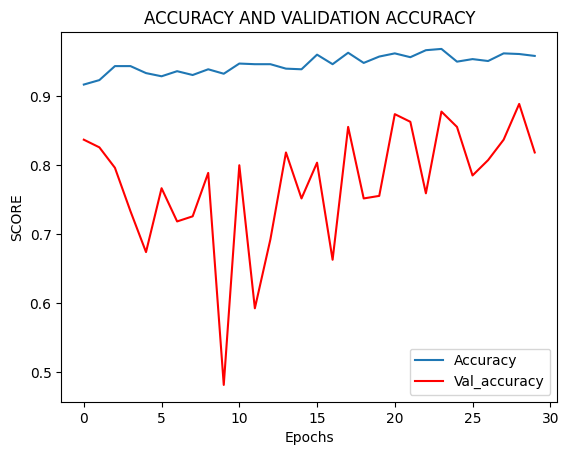

In [49]:
plt.title("ACCURACY AND VALIDATION ACCURACY")
plt.plot(report.history["accuracy"],label="Accuracy")
plt.plot(report.history["val_accuracy"],color="red",label="Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("SCORE")
plt.legend(loc="lower right")

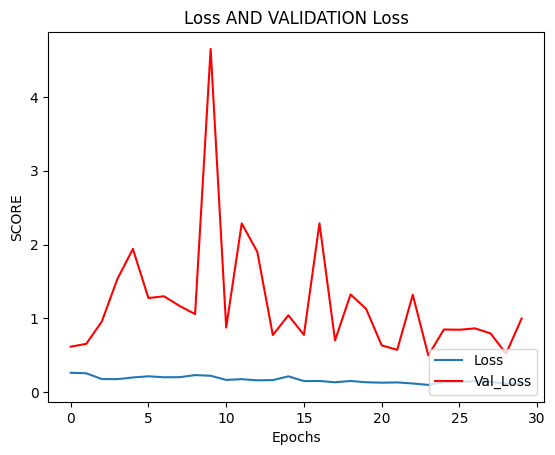

In [50]:
plt.title("Loss AND VALIDATION Loss")
plt.plot(report.history["loss"],label="Loss")
plt.plot(report.history["val_loss"],color="red",label="Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("SCORE")
plt.legend(loc="lower right")

In [70]:
test_predict=model.predict(test_images)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


In [71]:
test_predicted_values=np.argmax(test_predict,axis=1)
test_predicted_values

array([6, 3, 8, 7, 6, 7, 4, 2, 1, 7, 2, 4, 3, 5, 2, 5, 4, 4, 7, 5, 1, 2,
       6, 8, 6, 4, 0, 6, 6, 8, 3, 8, 6, 2, 8, 8, 2, 6, 6, 3, 6, 3, 3, 6,
       5, 3, 5, 6, 6, 7, 2, 3, 2, 7, 5, 5, 6, 7, 3, 8, 2, 4, 8, 6, 1, 7,
       4, 8, 2, 6, 6, 7, 6, 5, 2, 7, 3, 6, 2, 8, 6, 6, 2, 3, 7, 7, 4, 4,
       5, 4, 8, 7, 3, 3, 8, 3, 4, 4, 1, 4, 4, 6, 4, 8, 7, 1, 8, 1, 7, 2,
       6, 4, 1, 6, 6, 3, 4, 7, 1, 6, 8, 8, 4, 5, 6, 8, 4, 6, 4, 3, 5, 5,
       0, 1, 5, 1, 6, 4, 6, 6, 3, 1, 5, 7, 3, 4, 0, 6, 8, 6, 5, 0, 7, 7,
       2, 6, 0, 3, 0, 0, 5, 6, 7, 0, 7, 8, 4, 6, 5, 1, 6, 7, 4, 5, 8, 3,
       1, 2, 8, 8, 3, 8, 8, 4, 8, 7, 8, 5, 4, 4, 3, 3, 1, 8, 7, 5, 8, 8,
       4, 3, 8, 5, 8, 6, 4, 6, 7, 6, 5, 5, 0, 6, 1, 7, 2, 1, 7, 1, 2, 4,
       2, 5, 2, 6, 5, 4, 4, 1, 0, 2, 4, 5, 2, 2, 3, 1, 4, 5, 4, 5, 6, 6,
       4, 3, 0, 6, 5, 1, 5, 1, 7, 5, 2, 7, 4, 8, 3, 7, 1, 4, 2, 4, 7, 3,
       4, 8, 5, 7, 4, 6], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [72]:
train_predict=model.predict(train_images)
train_predict_values=np.argmax(train_predict,axis=1)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


In [73]:
test_score=accuracy_score(test_classes,test_predicted_values)
train_score=accuracy_score(train_classes,train_predict_values)

In [74]:
print("TEST ACCURACY SCORE {:.2f} AND TRAIN ACCURACY SCORE {:.2f}".format(test_score*100,train_score*100))

TEST ACCURACY SCORE 91.11 AND TRAIN ACCURACY SCORE 98.71


In [56]:
cm1=confusion_matrix(test_classes,test_predicted_values)

<Axes: title={'center': 'Heat Map For Test Data Set'}>

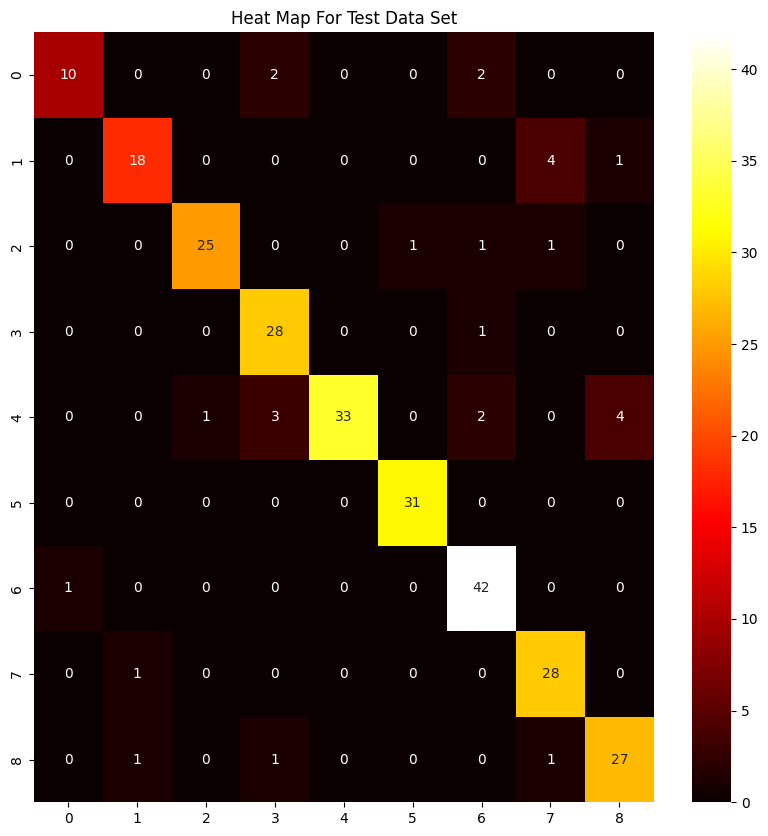

In [57]:
import seaborn as sea
plt.figure(figsize=(10,10))
plt.title("Heat Map For Test Data Set")
sea.heatmap(cm1,annot=True,cmap="hot")

In [58]:
cm_train=confusion_matrix(train_classes,train_predict_values)
cm_train

array([[ 84,   0,   0,   1,   0,   0,   1,   0,   0],
       [  0,  82,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0, 143,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,  86,   0,   0,   0,   0,   0],
       [  0,   2,   0,  17, 126,   0,   2,   0,   3],
       [  0,   0,   0,   0,   0, 155,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 167,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1, 123,   0],
       [  0,   0,   0,   3,   0,   0,   1,   0,  80]], dtype=int64)

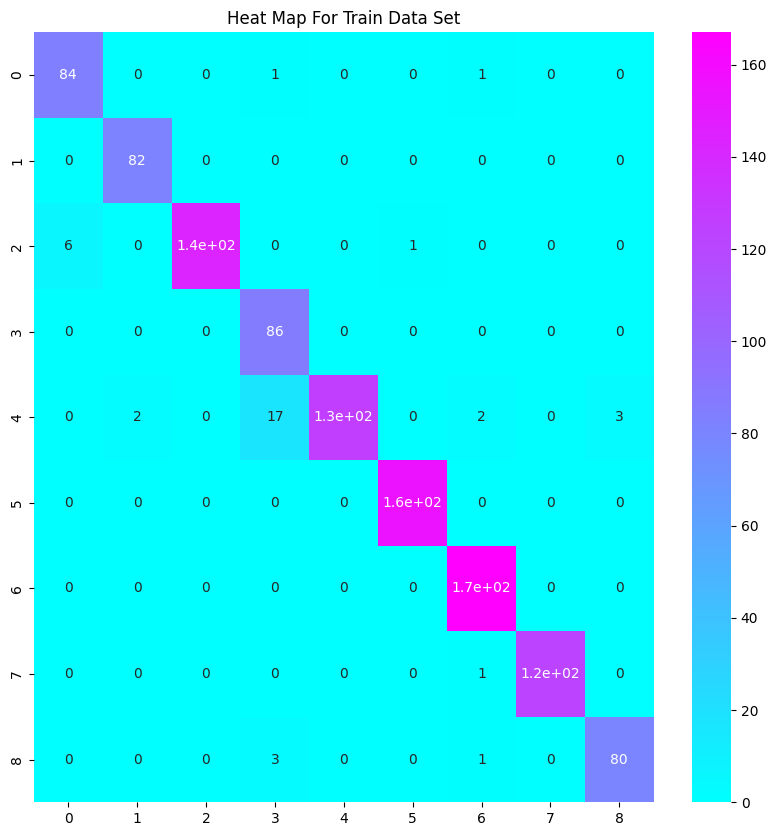

In [59]:
plt.figure(figsize=(10,10))
plt.title("Heat Map For Train Data Set")
sea.heatmap(cm_train,annot=True,cmap="cool")
plt.show()

In [60]:
test_recall=(cm1[0][0])/((cm1[0][0])+(cm1[0][1]))
test_x=round(test_recall,2)
test_fpr=(cm1[1][0])/((cm1[1][0])+(cm1[1][1]))
test_y=round(test_fpr,2)

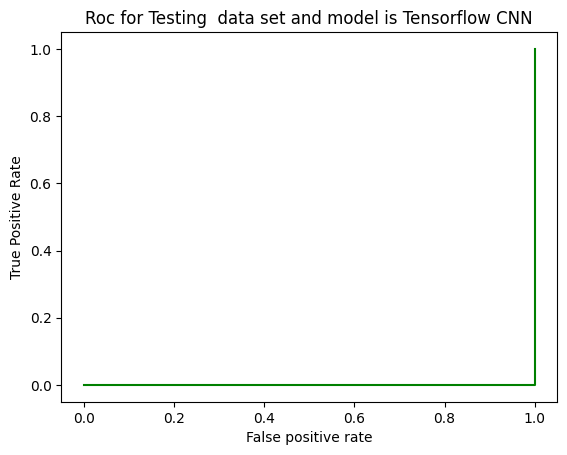

In [61]:
plt.title("Roc for Testing  data set and model is Tensorflow CNN")
plt.xlabel("False positive rate")
plt.ylabel("True Positive Rate")
plt.plot([0,test_x,1],[0,test_y,1],color="green")
plt.show()

In [62]:
train_recall=(cm_train[0][0])/((cm_train[0][0])+(cm_train[0][1]))
train_x=round(train_recall,2)
train_fpr=(cm_train[1][0])/((cm_train[1][0])+(cm_train[1][1]))
train_y=round(train_fpr,2)

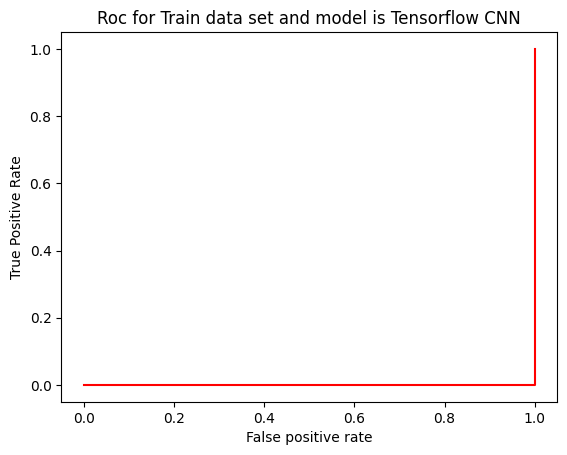

In [63]:
plt.title("Roc for Train data set and model is Tensorflow CNN")
plt.xlabel("False positive rate")
plt.ylabel("True Positive Rate")
plt.plot([0,train_x,1],[0,train_y,1],color="red")
plt.show()

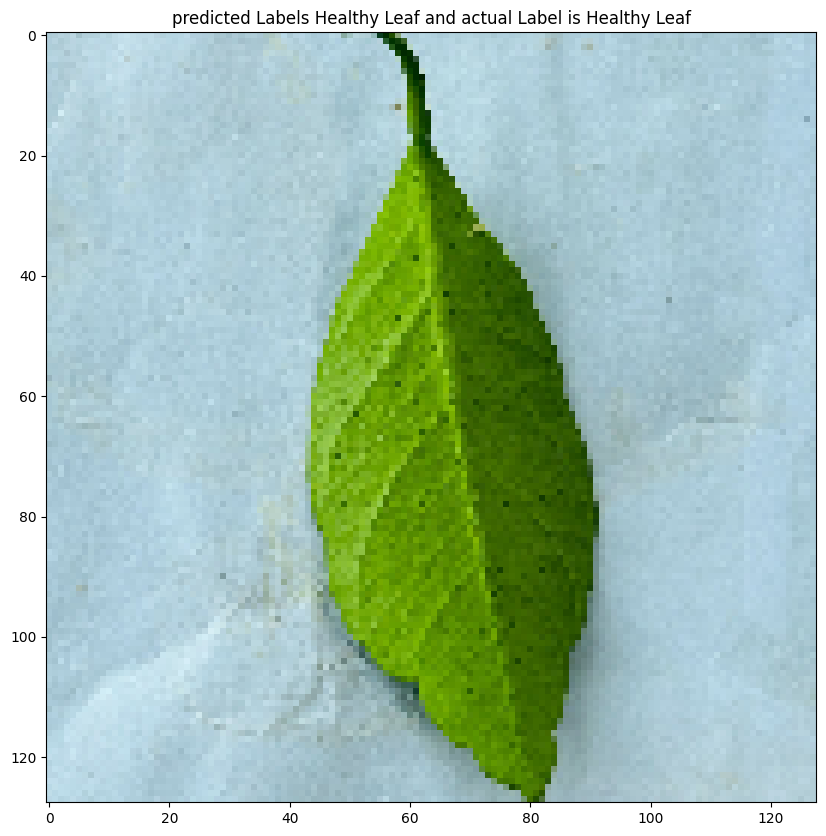

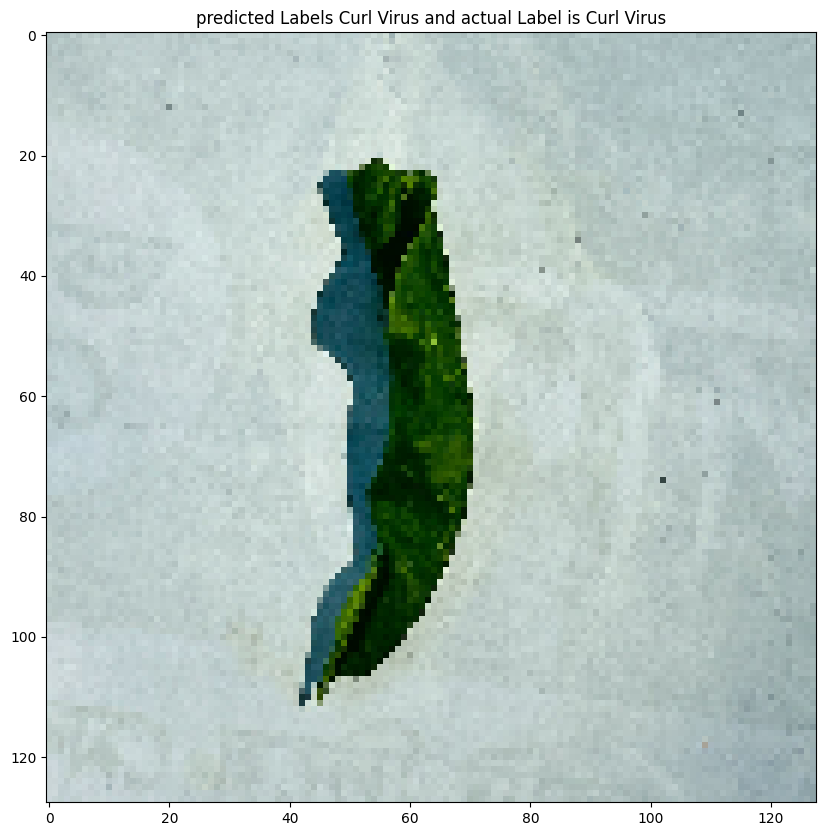

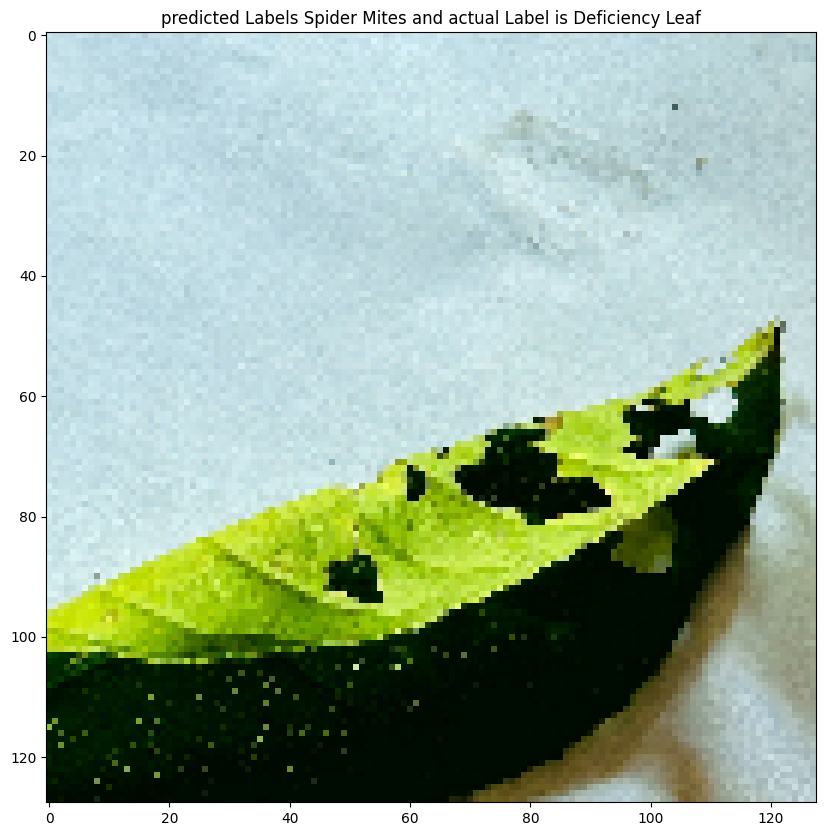

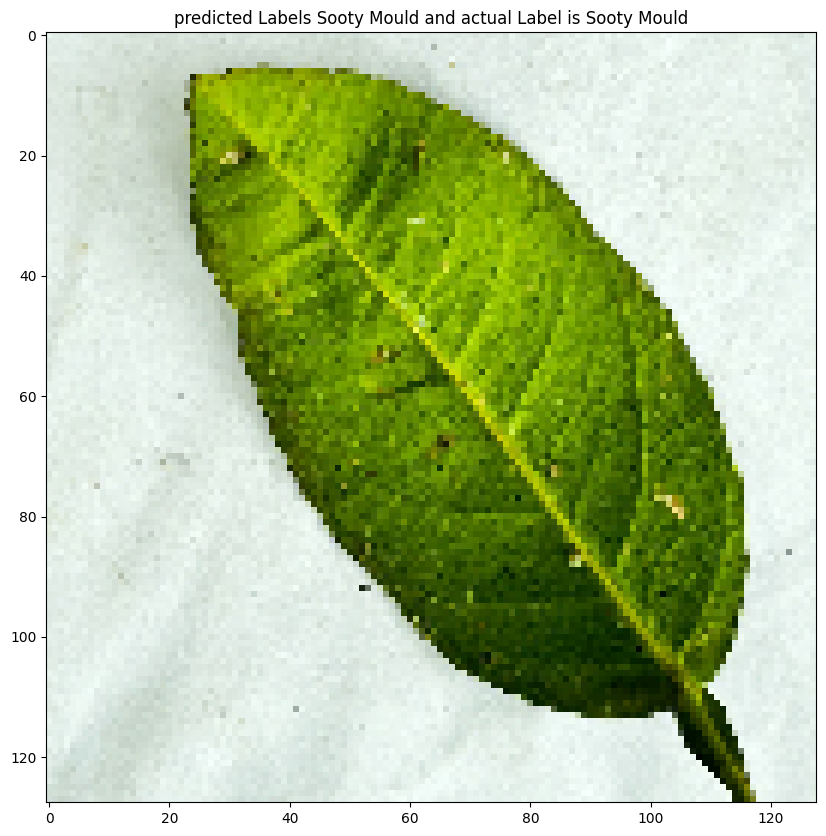

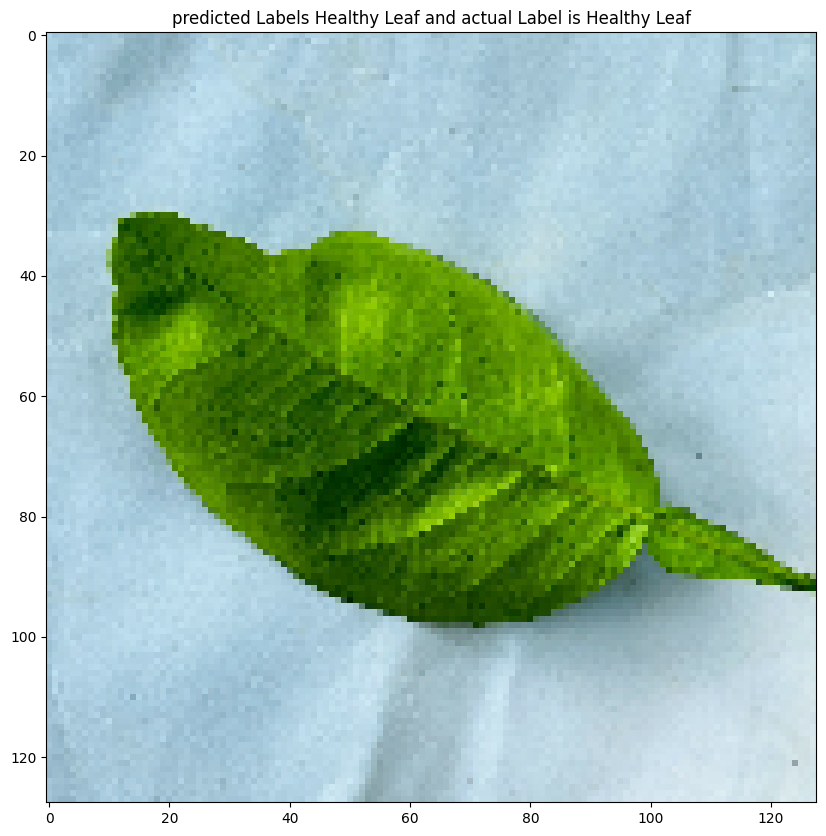

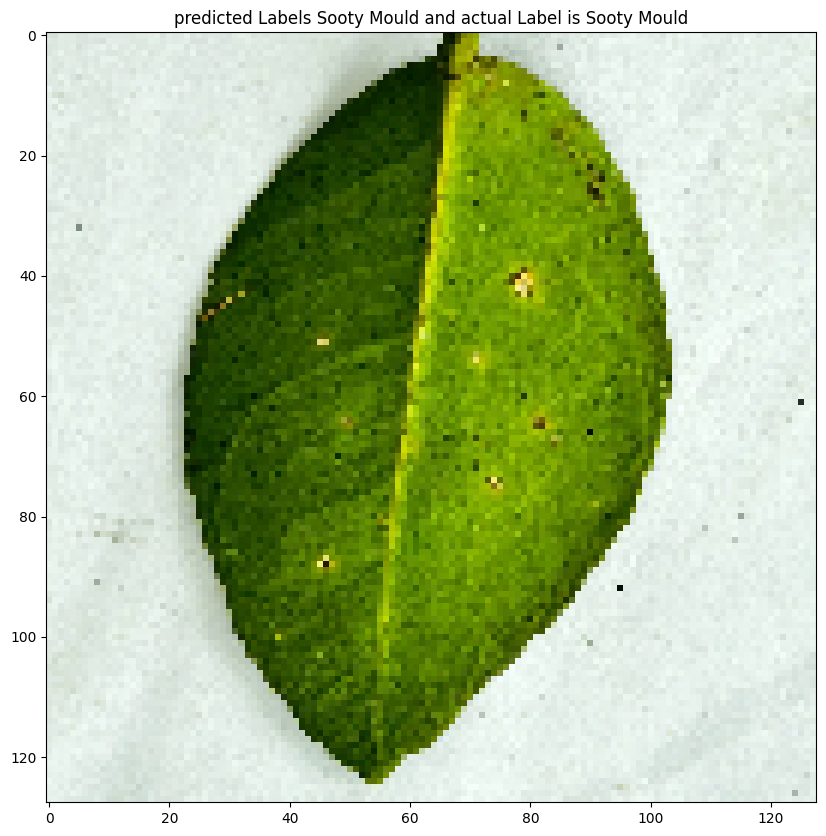

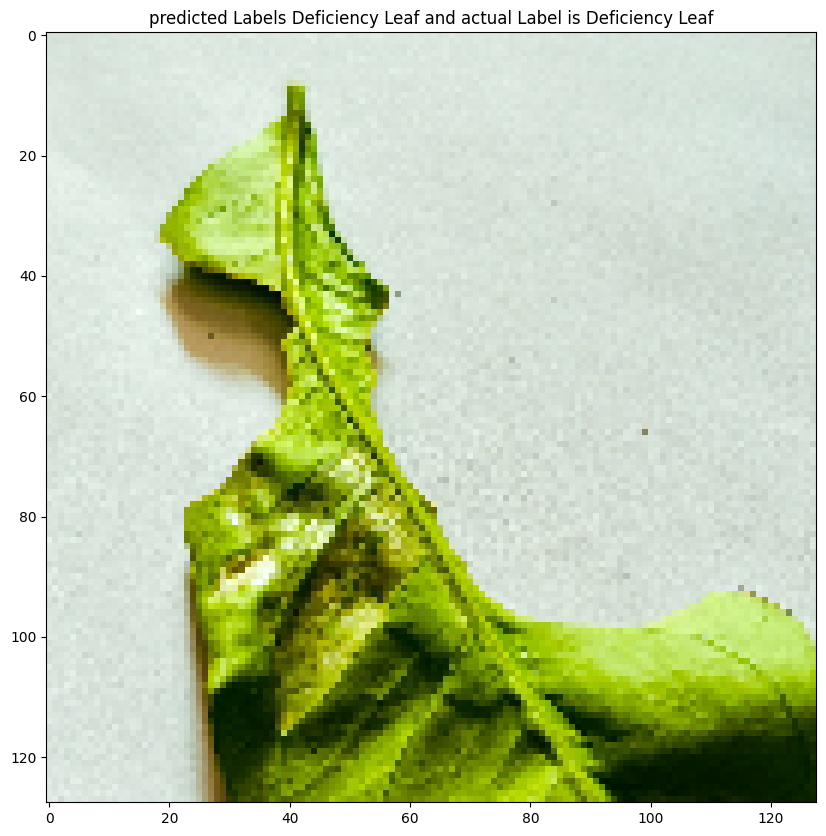

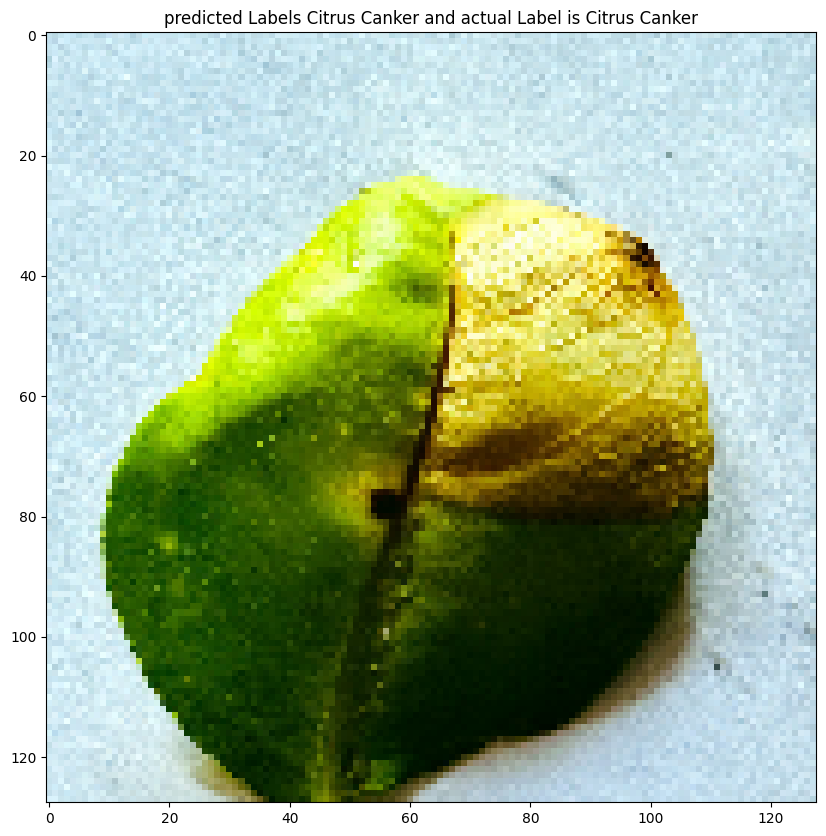

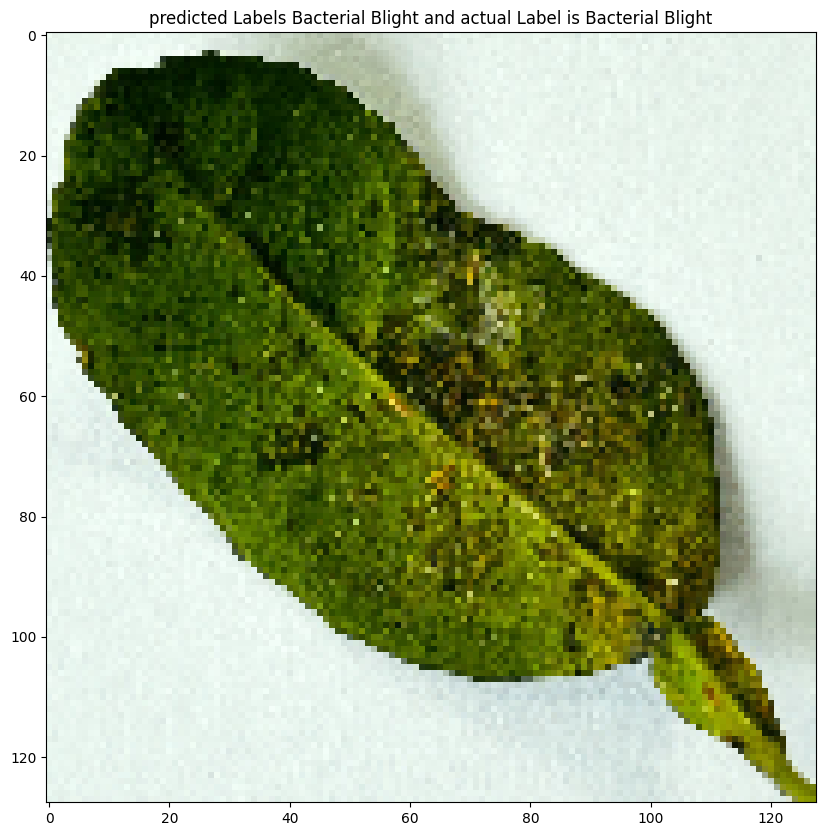

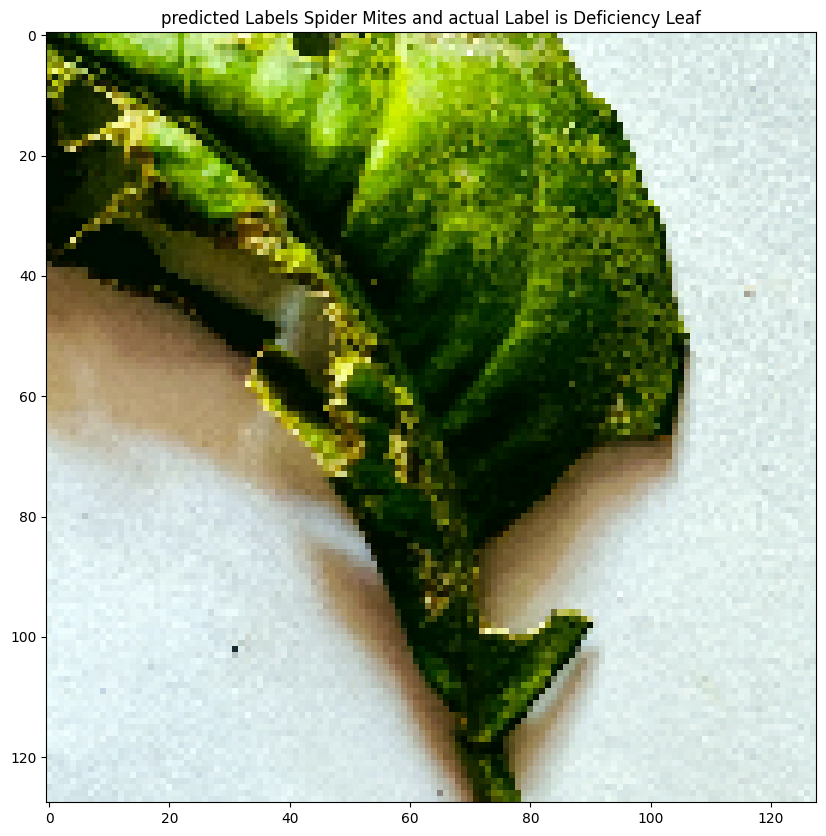

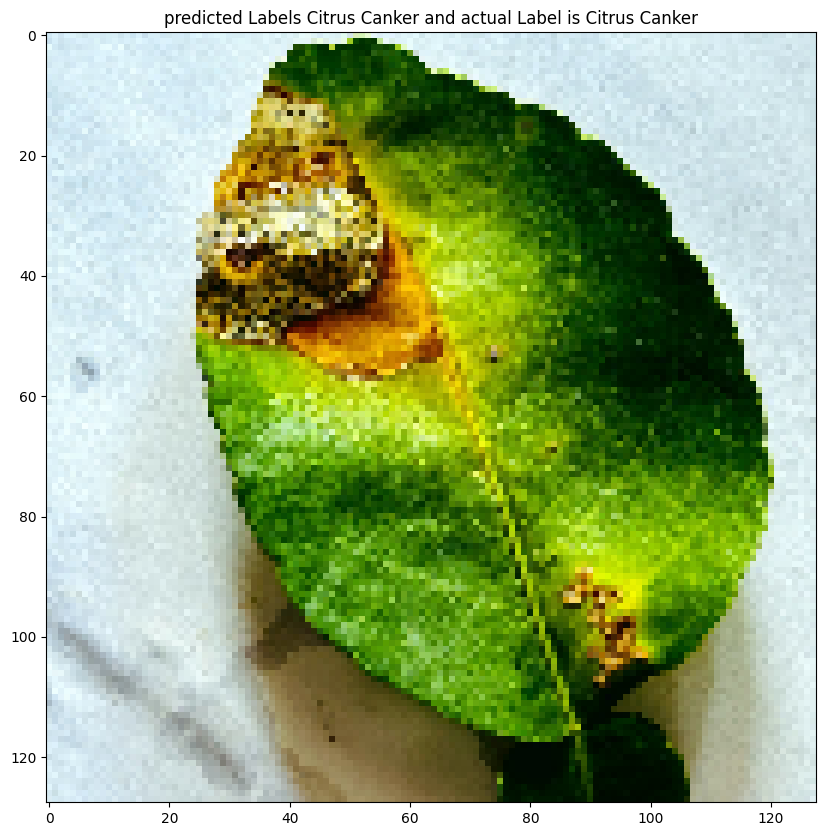

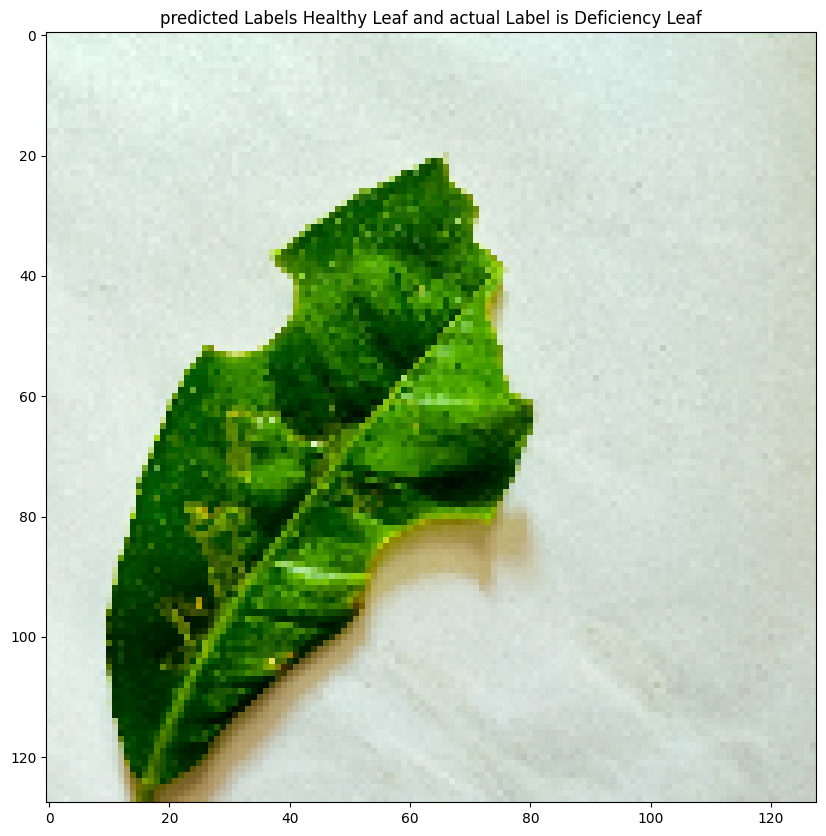

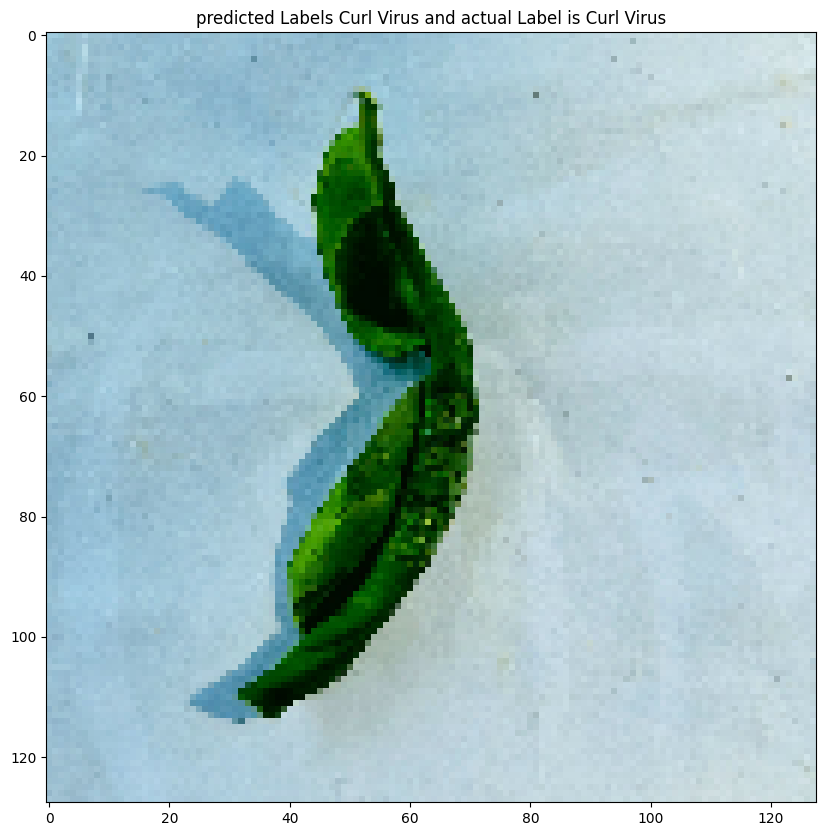

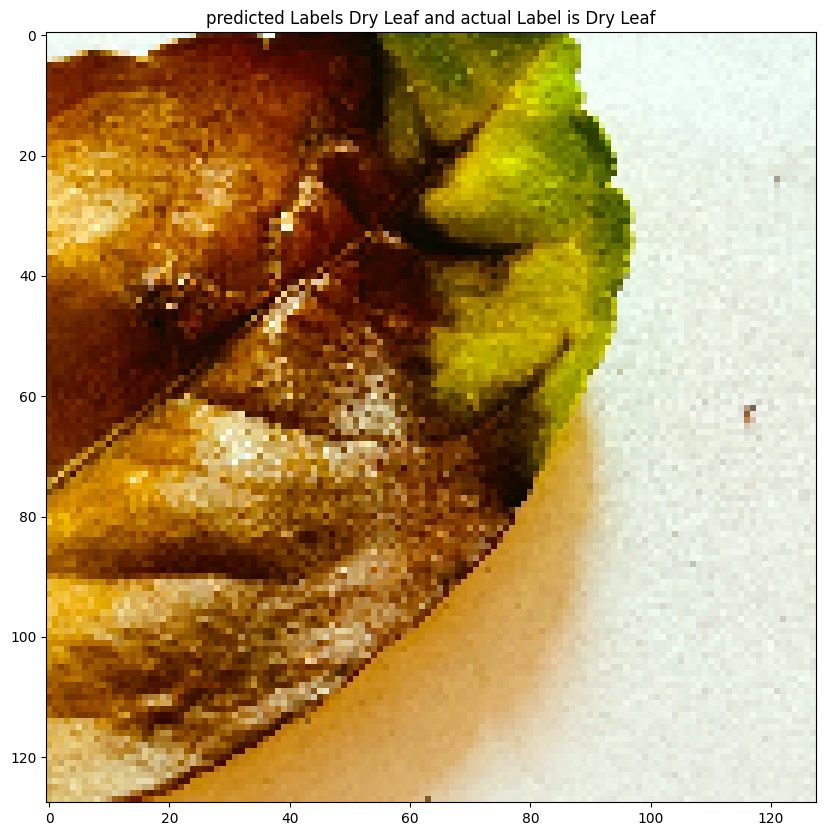

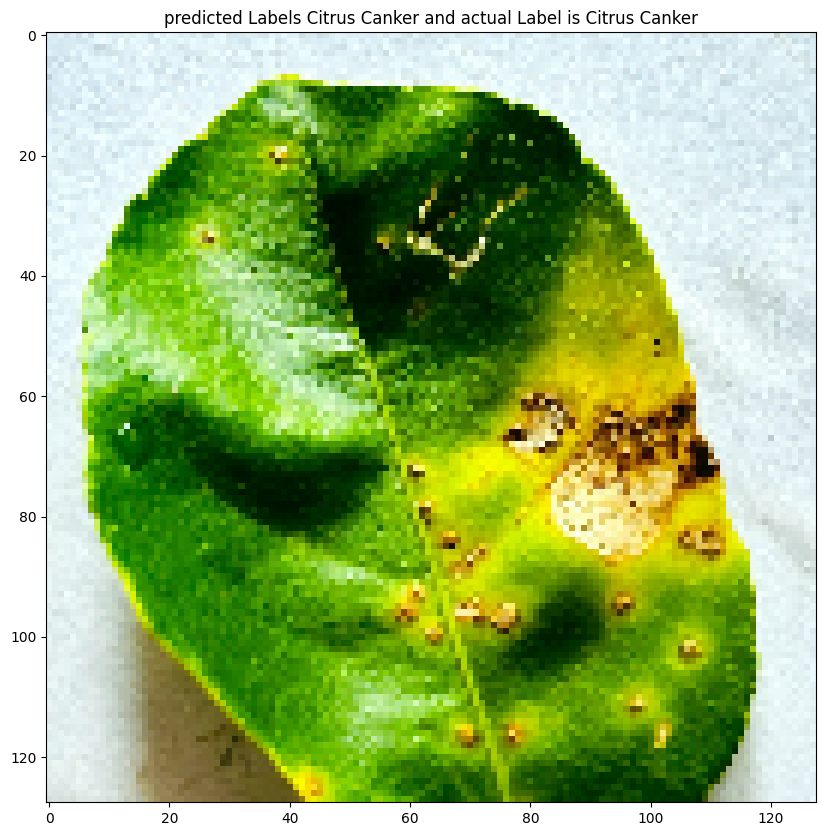

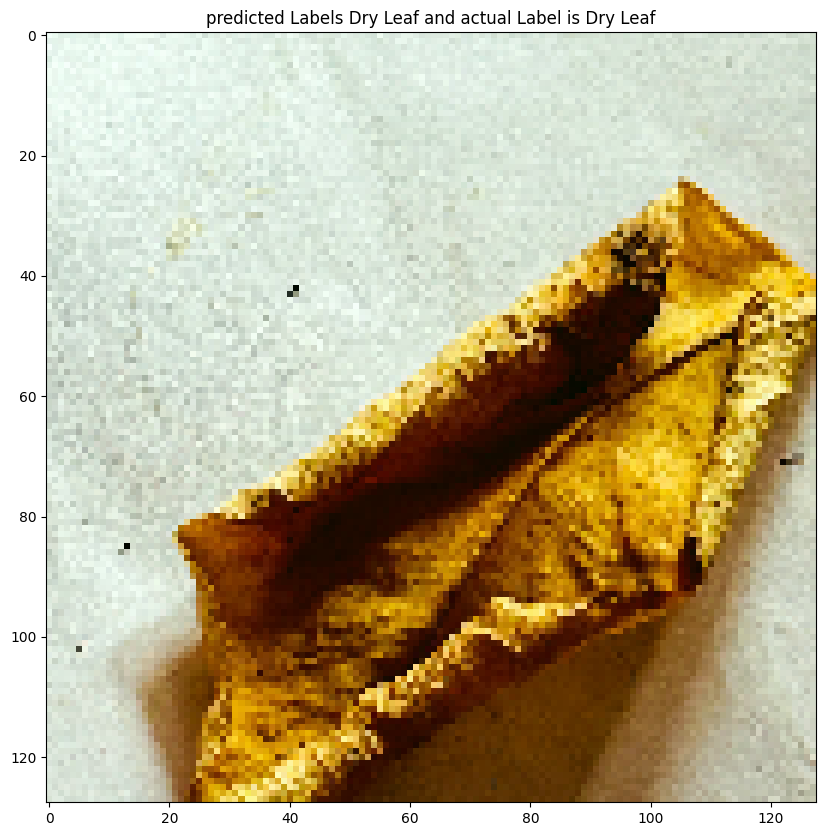

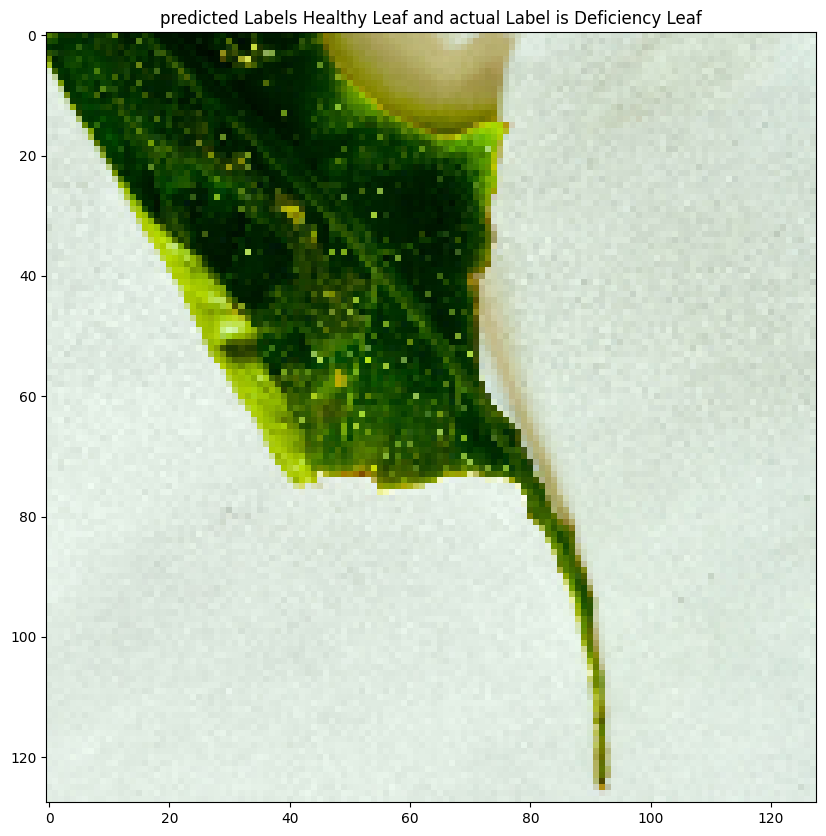

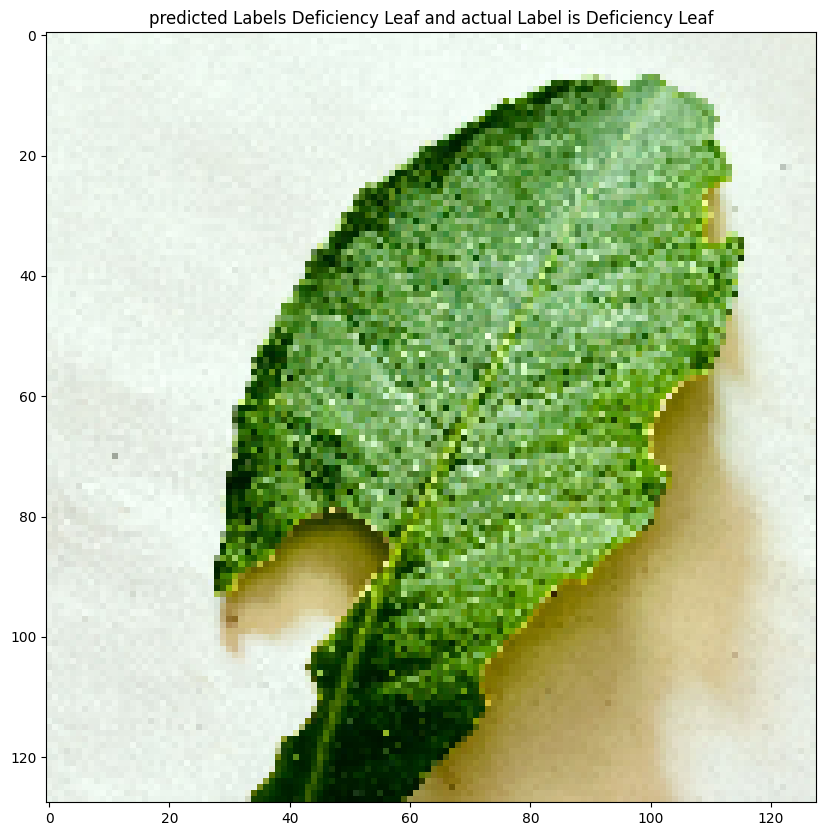

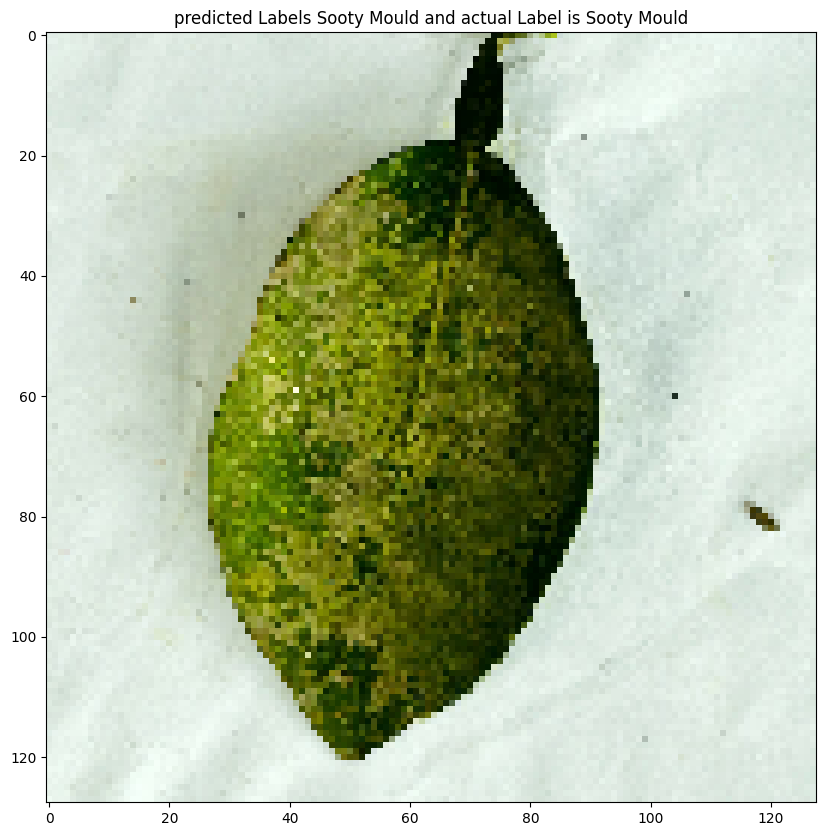

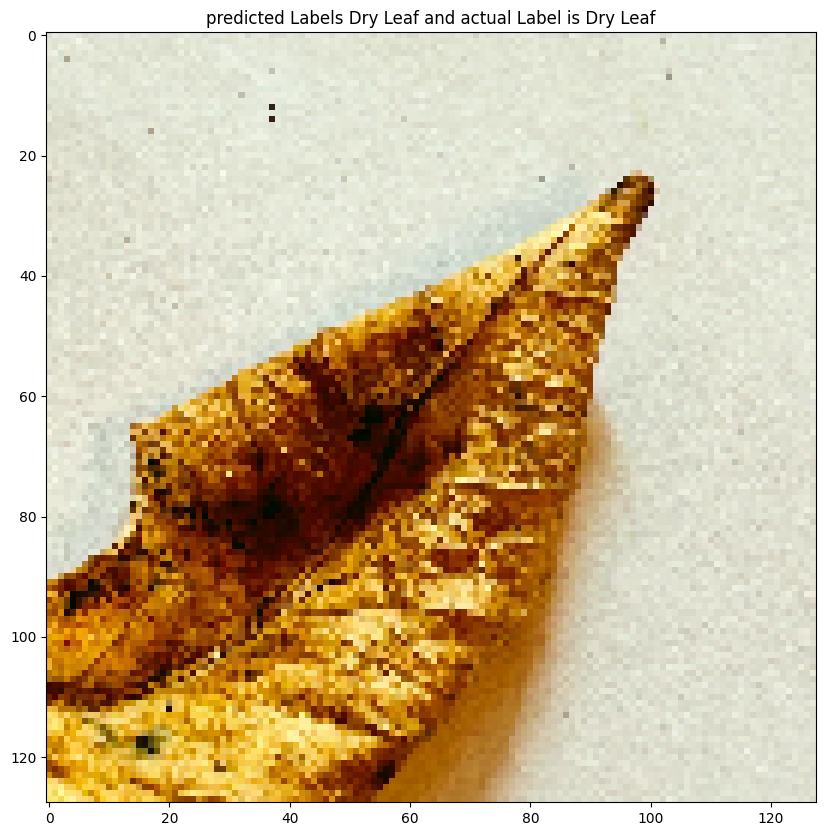

In [64]:
for i in range(20):
    plt.figure(figsize=(10,10))
    plt.title("predicted Labels {} and actual Label is {}".format(map_dict[test_predicted_values[i]],map_dict[test_classes[i]]))
    plt.imshow(test_images[i])
    plt.show()

In [65]:
import pickle 
with open("Leaf_model_pickle.pkl",'wb') as f:
    pickle.dump(model,f)

In [66]:
with open('leaf_model_pickle.pkl',"rb") as f:
    model=pickle.load(f)

In [97]:
report4=model.fit(train_images,train_labels,epochs=1,validation_data=[test_images,test_labels],callbacks=es)

34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.9878 - loss: 0.0380 - val_accuracy: 0.9222 - val_loss: 0.4921


In [98]:
import pickle 
with open("Leaf_model_pickle1.pkl",'wb') as f:
    pickle.dump(model,f)

In [99]:
import os
print(os.getcwd())

C:\Users\vanam
